In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/fd-export.csv')
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

C:\Users\anvay\Anaconda3\envs\cs676\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Get the users where trackable name is depression atleast once in their checking cycle
depressed_users = df.groupby(['user_id', 'checkin_date']).filter(lambda x: 'Depression' in x['trackable_name'].values)
depression_days = depressed_users.groupby(['user_id', 'checkin_date'])

In [3]:
depression_days

In [3]:
def add_depression_score(x):
    return x[x['trackable_name'] == 'Depression']['trackable_value'].values[0]


depression_scores = depression_days.apply(add_depression_score)
depression_scores = depression_scores.reset_index()
depression_scores.columns = ["user_id", "checkin_date", "depression_score"]


In [5]:
depression_scores

,user_id,checkin_date,depression_score
0,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,2018-03-04,2
1,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,2018-03-05,1
2,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,2018-03-06,1
3,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,2018-03-07,1
4,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,2018-03-08,0
...,...,...,...
40787,QEVuQwEAzvD7YpFZhX2mWKvuLNJJ0g==,2017-01-23,2
40788,QEVuQwEAzwV/YWCB2G2d3PdKZRoheg==,2018-01-03,1
40789,QEVuQwEAzwV/YWCB2G2d3PdKZRoheg==,2018-01-05,2
40790,QEVuQwEAzwV/YWCB2G2d3PdKZRoheg==,2018-01-10,2


In [4]:
# Get corresponding treatments
depressed_users = depressed_users[depressed_users['trackable_type'] == 'Treatment'].append(depressed_users[depressed_users['trackable_type'] == 'Tag'])

In [ ]:
depressed_users = depressed_users.merge(depression_scores, on=['user_id','checkin_date'])
depressed_users['depression_score'] = pd.to_numeric(depressed_users['depression_score'])

In [ ]:
depressed_users

In [ ]:
# Sample User
user = depressed_users[depressed_users['user_id'] == 'QEVuQwEAITdV7qg+AKliR3aWQEBtlw==']

In [ ]:
user

In [2]:
#create a dataframe of treatments with their start date
treatments = df[df['trackable_type'] == "Treatment"]

In [3]:
treatments

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
25,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,9890,Treatment,Zofran,8.0 mg
58,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-27,4934,Treatment,Klonopin,0.5 mg
59,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-27,9890,Treatment,Zofran,4.0 mg
201,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-26,1470,Treatment,Caffeine,100.0 mg
202,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-26,5681,Treatment,Methadone,20.0 mg
...,...,...,...,...,...,...,...,...,...
3487533,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,869,Treatment,Azithromycin,2 x 250 mg
3487534,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,8988,Treatment,Tramadol,1 dose
3487535,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,24574,Treatment,ultra levure,3x
3487536,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,493,Treatment,Amoxicillin,4x/ 1g


In [4]:
treatment_start_dates = treatments.groupby(['user_id', 'trackable_name'])['checkin_date'].min().reset_index()
treatment_end_dates = treatments.groupby(['user_id', 'trackable_name'])['checkin_date'].max().reset_index()
treatment_dates = treatment_start_dates.merge(treatment_end_dates, on=['user_id','trackable_name'])

In [5]:
conditions = df[(df['trackable_type'] == "Condition") | (df['trackable_type'] == "Symptom")]
conditions_start_end = conditions.groupby(['user_id', 'trackable_name'])['checkin_date'].min().reset_index()
conditions_start_end = conditions_start_end.merge(conditions.groupby(['user_id', 'trackable_name'])['checkin_date'].max().reset_index(), on=['user_id','trackable_name'])

In [6]:
min_days_threshold = 14
conditions_start_end = conditions_start_end[(conditions_start_end['checkin_date_y'] - conditions_start_end['checkin_date_x']).astype('timedelta64[D]') > min_days_threshold]
dates_df = conditions_start_end.merge(treatment_dates, on='user_id')

In [7]:
#changing column names because they are confusing post merge
dates_df.columns = ['user_id','symptom_name','symptom_start','symptom_end', 'treatment_name','treatment_start', 'treatment_end']

In [8]:
minthresh_symptreatment_logg = 7

#remove symptoms/conditions that started logging around the same time as the treatment started logging
dates_df = dates_df[(dates_df['treatment_start'] - dates_df['symptom_start']).astype('timedelta64[D]') > minthresh_symptreatment_logg ]
#remove symptoms/conditions that stopped logging before the treatment started logging
dates_df = dates_df[(dates_df['symptom_end'] - dates_df['treatment_start']).astype('timedelta64[D]') > minthresh_symptreatment_logg ]


In [9]:
dates_df.shape

(75630, 7)

In [14]:
#iterate through and find the trackable_values before and after the treatment date
def findBeforeAndAfterTreatment(dates_df_local, orig_df):
    new_df = pd.DataFrame(columns=['user_id', 'age', 'sex', 'country', 'condition','treatment','before_value','after_value','effectiveness'])
    count=1
    for row in dates_df_local.iterrows():
        if(count%50==0):
            print(str(count//50)+ " more done")
        row = row[1]
        df_user_symptom = orig_df[(orig_df['user_id'] == row['user_id']) & (orig_df['trackable_name'] == row['symptom_name'])]
        values_before = df_user_symptom[(df_user_symptom['checkin_date'] < row['treatment_start'])]['trackable_value'].values
        values_after = df_user_symptom[(df_user_symptom['checkin_date'] >= row['treatment_start']) & (df_user_symptom['checkin_date'] <= row['treatment_end'])]['trackable_value'].values
        values_before = [x for x in values_before if str(x) != 'nan']
        values_after = [x for x in values_after if str(x) != 'nan']
        values_before = map(int,values_before)
        values_after = map(int,values_after)
        mean_before = np.mean(list(values_before))
        mean_after = np.mean(list(values_after))
        new_df = new_df.append({'user_id' : row['user_id'], 'age' : orig_df[orig_df['user_id'] == row['user_id']]['age'].values[0], 'sex' : orig_df[orig_df['user_id'] == row['user_id']]['sex'].values[0], 'country' : orig_df[orig_df['user_id'] == row['user_id']]['country'].values[0], 'condition' : row['symptom_name'], 'treatment' : row['treatment_name'], 'before_value' : mean_before, 'after_value' : mean_after, 'effectiveness' : mean_before - mean_after}, ignore_index=True)
        count+=1
    return new_df

treatments_only = findBeforeAndAfterTreatment(dates_df, df)
print(treatments_only.head(10))
print("users that started taking a treatment after logging conditions " + str(len(treatments_only)))
print("users that report lower condition ratings while on a treatment " + str(len(treatments_only[treatments_only['effectiveness'] > 0])))
treatments_only.to_csv('effectiveness_treatments.csv', index=False)

1 more done
2 more done
3 more done
4 more done
5 more done
6 more done
7 more done
8 more done
9 more done
10 more done
11 more done
12 more done
13 more done
14 more done
15 more done
16 more done
17 more done
18 more done
19 more done
20 more done
21 more done
22 more done
23 more done
24 more done
25 more done
26 more done
27 more done
28 more done
29 more done
30 more done
31 more done
32 more done
33 more done
34 more done
35 more done
36 more done
37 more done
38 more done
39 more done
40 more done
41 more done
42 more done
43 more done
44 more done
45 more done
46 more done
47 more done
48 more done
49 more done
50 more done
51 more done
52 more done
53 more done
54 more done
55 more done
56 more done
57 more done
58 more done
59 more done
60 more done
61 more done
62 more done
63 more done
64 more done
65 more done
66 more done
67 more done
68 more done
69 more done
70 more done
71 more done
72 more done
73 more done
74 more done
75 more done
76 more done
77 more done
78 more 

594 more done
595 more done
596 more done
597 more done
598 more done
599 more done
600 more done
601 more done
602 more done
603 more done
604 more done
605 more done
606 more done
607 more done
608 more done
609 more done
610 more done
611 more done
612 more done
613 more done
614 more done
615 more done
616 more done
617 more done
618 more done
619 more done
620 more done
621 more done
622 more done
623 more done
624 more done
625 more done
626 more done
627 more done
628 more done
629 more done
630 more done
631 more done
632 more done
633 more done
634 more done
635 more done
636 more done
637 more done
638 more done
639 more done
640 more done
641 more done
642 more done
643 more done
644 more done
645 more done
646 more done
647 more done
648 more done
649 more done
650 more done
651 more done
652 more done
653 more done
654 more done
655 more done
656 more done
657 more done
658 more done
659 more done
660 more done
661 more done
662 more done
663 more done
664 more done
665 mo

1168 more done
1169 more done
1170 more done
1171 more done
1172 more done
1173 more done
1174 more done
1175 more done
1176 more done
1177 more done
1178 more done
1179 more done
1180 more done
1181 more done
1182 more done
1183 more done
1184 more done
1185 more done
1186 more done
1187 more done
1188 more done
1189 more done
1190 more done
1191 more done
1192 more done
1193 more done
1194 more done
1195 more done
1196 more done
1197 more done
1198 more done
1199 more done
1200 more done
1201 more done
1202 more done
1203 more done
1204 more done
1205 more done
1206 more done
1207 more done
1208 more done
1209 more done
1210 more done
1211 more done
1212 more done
1213 more done
1214 more done
1215 more done
1216 more done
1217 more done
1218 more done
1219 more done
1220 more done
1221 more done
1222 more done
1223 more done
1224 more done
1225 more done
1226 more done
1227 more done
1228 more done
1229 more done
1230 more done
1231 more done
1232 more done
1233 more done
1234 more 

In [19]:
null_effectiveness = treatments_only[treatments_only['effectiveness'].isnull()]

In [35]:
treatments_only['effectiveness'].max()

4.0

In [36]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp37-cp37m-win_amd64.whl size=757403 sha256=e02c149e439e268711f35328831ead080fd8f334608dbc7418cee275ace45cad
  Stored in directory: C:\Users\anvay\AppData\Local\pip\Cache\wheels\cc\fa\8c\16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [37]:
null_effectiveness

,user_id,age,sex,country,condition,treatment,before_value,after_value,effectiveness
80,QEVuQwEA+3sPwlvCYLXMhjgY6TpbqQ==,NaN,doesnt_say,US,Knee pain,Albuterol,1.500000,NaN,NaN
441,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,Cold hands,Ankle brace,2.200000,NaN,NaN
445,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,Cold hands,Dulcoease,2.200000,NaN,NaN
562,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,Menstrual cramps,Salbutamol,4.000000,NaN,NaN
759,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,pre-syncope,Ankle brace,1.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
74718,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,Nausea,Tylenol,2.000000,NaN,NaN
74719,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,nasal congestion,Tylenol,2.333333,NaN,NaN
74720,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,runny nose,Tylenol,1.750000,NaN,NaN
74721,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,sinus pressure,Tylenol,3.000000,NaN,NaN


In [46]:
# user - condition 
# item - treatment
# rating = effectiveness
training_df = treatments_only.dropna(subset=['effectiveness'])
training_df = training_df[['condition','treatment','effectiveness']]
testing_df = null_effectiveness[['condition','treatment','effectiveness']]

In [49]:
from surprise import SVD,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(-4, 4))
data = Dataset.load_from_df(training_df,reader)

trainset, testset = train_test_split(data, test_size=.25)

# SVD++ algorithm.
algo = SVDpp()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)



RMSE: 0.7127


0.7126769630002288

In [50]:
null_effectiveness

,user_id,age,sex,country,condition,treatment,before_value,after_value,effectiveness
80,QEVuQwEA+3sPwlvCYLXMhjgY6TpbqQ==,NaN,doesnt_say,US,Knee pain,Albuterol,1.500000,NaN,NaN
441,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,Cold hands,Ankle brace,2.200000,NaN,NaN
445,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,Cold hands,Dulcoease,2.200000,NaN,NaN
562,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,Menstrual cramps,Salbutamol,4.000000,NaN,NaN
759,QEVuQwEA+m9WpwsPfXlqM106OQV8Dg==,22.0,female,GB,pre-syncope,Ankle brace,1.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
74718,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,Nausea,Tylenol,2.000000,NaN,NaN
74719,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,nasal congestion,Tylenol,2.333333,NaN,NaN
74720,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,runny nose,Tylenol,1.750000,NaN,NaN
74721,QEVuQwEAykUg8YwstzHCLEE/5nZN3g==,19.0,female,US,sinus pressure,Tylenol,3.000000,NaN,NaN


In [70]:
import csv 
pred_list = []
header = ['Condition', 'Treatment', 'Effectiveness']

with open('pred_rec_system.csv', 'wt', newline ='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(i for i in header)
    for row in testing_df.iterrows():
        condition = str(row[1].condition)
        treatment = str(row[1].treatment)
        pred = algo.predict(condition, treatment, verbose=True)
        writer.writerow([condition,treatment,pred.est])


user: Knee pain  item: Albuterol  r_ui = None   est = -0.28   {'was_impossible': False}
user: Cold hands item: Ankle brace r_ui = None   est = 0.26   {'was_impossible': False}
user: Cold hands item: Dulcoease  r_ui = None   est = 0.44   {'was_impossible': False}
user: Menstrual cramps item: Salbutamol r_ui = None   est = -0.02   {'was_impossible': False}
user: pre-syncope  item: Ankle brace r_ui = None   est = 0.08   {'was_impossible': False}
user: pre-syncope  item: Dulcoease  r_ui = None   est = 0.22   {'was_impossible': False}
user: right ankle pain item: Ankle brace r_ui = None   est = 0.77   {'was_impossible': False}
user: right ankle pain item: Dulcoease  r_ui = None   est = 0.73   {'was_impossible': False}
user: Air hunger item: BeachBody OnDemand r_ui = None   est = 0.35   {'was_impossible': False}
user: Air hunger item: Cold Pack  r_ui = None   est = 0.07   {'was_impossible': False}
user: Air hunger item: Cyclizine  r_ui = None   est = 0.34   {'was_impossible': False}
user: Ai

user: Anxiety    item: pain patch r_ui = None   est = -0.02   {'was_impossible': False}
user: Autism spectrum disorder item: hydrocodone-acetaminophen r_ui = None   est = 0.16   {'was_impossible': False}
user: Autism spectrum disorder item: pain patch r_ui = None   est = 0.02   {'was_impossible': False}
user: Chest pain item: pain patch r_ui = None   est = 0.09   {'was_impossible': False}
user: Decreased appetite item: Naproxen   r_ui = None   est = -0.04   {'was_impossible': False}
user: Depression item: pain patch r_ui = None   est = -0.03   {'was_impossible': False}
user: Fatigue    item: Naproxen   r_ui = None   est = -0.31   {'was_impossible': False}
user: Hand pain  item: Naproxen   r_ui = None   est = 0.00   {'was_impossible': False}
user: Hand pain  item: pain patch r_ui = None   est = 0.06   {'was_impossible': False}
user: Headache   item: pain patch r_ui = None   est = 0.08   {'was_impossible': False}
user: Insomnia   item: pain patch r_ui = None   est = 0.44   {'was_impossib

user: Elbow pain item: Paracetamol r_ui = None   est = -0.07   {'was_impossible': False}
user: Fatigue    item: Paracetamol r_ui = None   est = -0.20   {'was_impossible': False}
user: Foot pain  item: Paracetamol r_ui = None   est = -0.15   {'was_impossible': False}
user: Headache   item: Paracetamol r_ui = None   est = -0.02   {'was_impossible': False}
user: Neck pain  item: Paracetamol r_ui = None   est = -0.00   {'was_impossible': False}
user: Depression item: Co-Codamol r_ui = None   est = 0.03   {'was_impossible': False}
user: Hot flashes item: Co-Codamol r_ui = None   est = 0.01   {'was_impossible': False}
user: Insomnia   item: Co-Codamol r_ui = None   est = 0.25   {'was_impossible': False}
user: Mouth ulcers item: Co-Codamol r_ui = None   est = -0.03   {'was_impossible': False}
user: Ankle pain item: Fluvoxamine r_ui = None   est = -0.21   {'was_impossible': False}
user: Ankle pain item: Low Dose Naltrexone r_ui = None   est = -0.24   {'was_impossible': False}
user: Ankle pain 

user: left foot pain item: Oxycodone  r_ui = None   est = 0.17   {'was_impossible': False}
user: left foot pain item: oxcycodone r_ui = None   est = 0.12   {'was_impossible': False}
user: left leg pain item: Oxycodone  r_ui = None   est = -0.03   {'was_impossible': False}
user: left leg pain item: oxcycodone r_ui = None   est = 0.03   {'was_impossible': False}
user: numbness in right foot item: Oxycodone  r_ui = None   est = -0.00   {'was_impossible': False}
user: numbness in right foot item: oxcycodone r_ui = None   est = 0.01   {'was_impossible': False}
user: numbness left foot item: Oxycodone  r_ui = None   est = -0.00   {'was_impossible': False}
user: numbness left foot item: oxcycodone r_ui = None   est = 0.01   {'was_impossible': False}
user: right foot pain item: Oxycodone  r_ui = None   est = -0.00   {'was_impossible': False}
user: right foot pain item: oxcycodone r_ui = None   est = 0.01   {'was_impossible': False}
user: Skin rash  item: Vitamin d  r_ui = None   est = 0.04   {

user: Stress in Bed No Reason item: DHEA 50 mg r_ui = None   est = 0.22   {'was_impossible': False}
user: Acid Reflux item: Feeding tube formula r_ui = None   est = -0.11   {'was_impossible': False}
user: Acid Reflux item: Manual fecal removal r_ui = None   est = 0.10   {'was_impossible': False}
user: Bladder spasms item: Feeding tube formula r_ui = None   est = 0.09   {'was_impossible': False}
user: Bladder spasms item: Manual fecal removal r_ui = None   est = 0.36   {'was_impossible': False}
user: Bloating   item: Feeding tube formula r_ui = None   est = -0.28   {'was_impossible': False}
user: Bloating   item: Manual fecal removal r_ui = None   est = -0.02   {'was_impossible': False}
user: Dizziness  item: Cetirizine r_ui = None   est = -0.53   {'was_impossible': False}
user: Fatigue    item: Feeding tube formula r_ui = None   est = -0.29   {'was_impossible': False}
user: Fatigue    item: Manual fecal removal r_ui = None   est = -0.01   {'was_impossible': False}
user: Headache   item

user: Fatigue    item: Low oxalate r_ui = None   est = -0.82   {'was_impossible': False}
user: Fatigue    item: Methylcobalamine r_ui = None   est = -0.88   {'was_impossible': False}
user: Fatigue    item: Tavegyl    r_ui = None   est = -0.41   {'was_impossible': False}
user: Fatigue    item: Trigger Points r_ui = None   est = -0.06   {'was_impossible': False}
user: Fatigue    item: Tylenol 3  r_ui = None   est = -0.48   {'was_impossible': False}
user: Fatigue    item: gluten free r_ui = None   est = 0.15   {'was_impossible': False}
user: Fatigue    item: massage    r_ui = None   est = 0.07   {'was_impossible': False}
user: Fatigue    item: rebounding r_ui = None   est = -0.60   {'was_impossible': False}
user: Headache   item: Aromatherapy r_ui = None   est = -0.19   {'was_impossible': False}
user: Headache   item: Cannabis   r_ui = None   est = 0.00   {'was_impossible': False}
user: Headache   item: DEHA       r_ui = None   est = -0.88   {'was_impossible': False}
user: Headache   item

user: Dysthymia  item: playing music r_ui = None   est = 0.60   {'was_impossible': False}
user: Fibromyalgia item: creative writing r_ui = None   est = 0.11   {'was_impossible': False}
user: Fibromyalgia item: playing music r_ui = None   est = 0.57   {'was_impossible': False}
user: GERD       item: creative writing r_ui = None   est = 0.04   {'was_impossible': False}
user: GERD       item: playing music r_ui = None   est = 0.71   {'was_impossible': False}
user: IBS        item: creative writing r_ui = None   est = 0.31   {'was_impossible': False}
user: IBS        item: playing music r_ui = None   est = 0.61   {'was_impossible': False}
user: Left wrist pain item: creative writing r_ui = None   est = 0.36   {'was_impossible': False}
user: Left wrist pain item: playing music r_ui = None   est = 0.55   {'was_impossible': False}
user: Lung Pain  item: creative writing r_ui = None   est = 0.03   {'was_impossible': False}
user: Lung Pain  item: playing music r_ui = None   est = 0.53   {'was_i

user: Pain       item: Progesterone r_ui = None   est = 0.01   {'was_impossible': False}
user: Pain       item: Relaxing   r_ui = None   est = -0.45   {'was_impossible': False}
user: Pain       item: Tranexamic acid r_ui = None   est = -0.19   {'was_impossible': False}
user: Pain       item: Valerian   r_ui = None   est = -0.32   {'was_impossible': False}
user: Pain       item: Vitamin B  r_ui = None   est = -0.35   {'was_impossible': False}
user: Pain       item: Zomig      r_ui = None   est = -0.19   {'was_impossible': False}
user: Pain       item: excedrin migraine r_ui = None   est = -0.21   {'was_impossible': False}
user: Pelvic pain item: Valerian   r_ui = None   est = -0.06   {'was_impossible': False}
user: Plantar fasciitis item: Valerian   r_ui = None   est = -0.23   {'was_impossible': False}
user: Poor mobility item: Achy breaky rub r_ui = None   est = 0.69   {'was_impossible': False}
user: Poor mobility item: Medication r_ui = None   est = 1.01   {'was_impossible': False}
us

user: Catastrophizing item: Adderall   r_ui = None   est = -0.07   {'was_impossible': False}
user: Catastrophizing item: Codeine    r_ui = None   est = -0.05   {'was_impossible': False}
user: Catastrophizing item: Dexedrine  r_ui = None   est = -0.69   {'was_impossible': False}
user: Crying     item: Adderall   r_ui = None   est = -0.34   {'was_impossible': False}
user: Crying     item: Codeine    r_ui = None   est = -0.22   {'was_impossible': False}
user: Crying     item: Dexedrine  r_ui = None   est = -0.83   {'was_impossible': False}
user: Depression item: Adderall   r_ui = None   est = -0.04   {'was_impossible': False}
user: Depression item: Codeine    r_ui = None   est = -0.24   {'was_impossible': False}
user: Depression item: Dexedrine  r_ui = None   est = -0.77   {'was_impossible': False}
user: Diarrhea   item: Adderall   r_ui = None   est = 0.11   {'was_impossible': False}
user: Diarrhea   item: Codeine    r_ui = None   est = -0.10   {'was_impossible': False}
user: Diarrhea   i

user: Lower abdomen pain item: Eyebright Complex r_ui = None   est = -0.26   {'was_impossible': False}
user: Lower abdomen pain item: Migraine Diet r_ui = None   est = -0.16   {'was_impossible': False}
user: Lower abdomen pain item: Nasonex    r_ui = None   est = 0.12   {'was_impossible': False}
user: Lower abdomen pain item: Pain management r_ui = None   est = -0.13   {'was_impossible': False}
user: Lower abdomen pain item: Panamax    r_ui = None   est = -0.07   {'was_impossible': False}
user: Lower abdomen pain item: Soluble Aspirin r_ui = None   est = -0.02   {'was_impossible': False}
user: Lower abdomen pain item: Spironolactone r_ui = None   est = -0.15   {'was_impossible': False}
user: Lower abdomen pain item: Valium     r_ui = None   est = 0.04   {'was_impossible': False}
user: Lower abdomen pain item: Ventolin   r_ui = None   est = 0.03   {'was_impossible': False}
user: Lower abdomen pain item: Vitamin B  r_ui = None   est = -0.12   {'was_impossible': False}
user: Lower abdomen

UnicodeEncodeError: 'charmap' codec can't encode characters in position 10-14: character maps to <undefined>

In [72]:
!pip install networkx

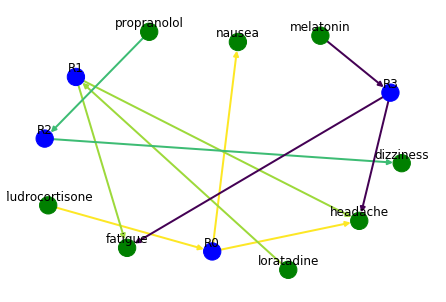

In [127]:
import matplotlib.pyplot as plt
import networkx as nx
res_df = pd.DataFrame([
                   [frozenset(["fludrocortisone"]), frozenset(('headache','nausea'))],
                   [frozenset(["loratadine"]), frozenset(('fatigue', 'headache'))],
                    [frozenset(["propranolol"]), frozenset(["dizziness"])],
     [frozenset(["melatonin"]), frozenset(('fatigue', 'headache'))],
     [frozenset(["lansoprazole"]), frozenset(["abdominal pain","headache"])]
                  ],
      columns=['antecedants', 'consequents'])










def draw_graph(rules, rules_to_show):
    
    G1 = nx.DiGraph()

    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   


    for i in range (rules_to_show):
        G1.add_nodes_from(["R"+str(i)])


        for a in rules.iloc[i]['antecedants']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('blue')
        else:
            color_map.append('green')       



    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
draw_graph(res_df,4)

In [108]:
import pandas as pd
df = pd.read_csv('effectiveness_treatments.csv')

In [117]:
import numpy as np
df_most = df.groupby(['condition']).agg(np.mean).reset_index().sort_values(['effectiveness'])[:10]

[Text(0, 0, 'occular migrane'),
 Text(0, 0, 'general muscle weakness'),
 Text(0, 0, 'Orthorexia'),
 Text(0, 0, 'Eye abrasion'),
 Text(0, 0, 'Shoulder Blade Pain'),
 Text(0, 0, 'Right eye nerve pain'),
 Text(0, 0, 'gag reflex'),
 Text(0, 0, 'sore neck'),
 Text(0, 0, 'achilles spurs '),
 Text(0, 0, 'plantar spurs')]

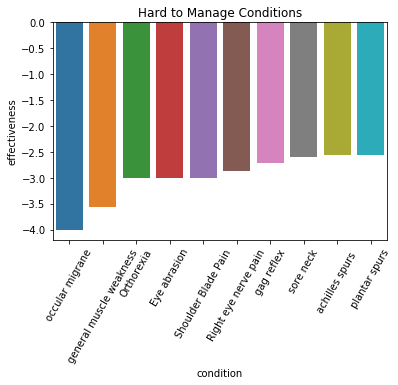

In [126]:
import seaborn as sns
plt = sns.barplot(data = df_most, x ='condition', y ='effectiveness')
plt.set_title('Hard to Manage Conditions')
plt.set_xticklabels(labels = plt.get_xticklabels(),rotation=60)

